## Stated with variables

Our goal is to find predictions that accurately predict the actual values

We've got a bunch of input data

$x \in \mathbb{R}^{n}$

We've got our `0` or `1` target

$y$

Our predictions between `0` and `1`

$\hat{y}$

We'll arrive at our predictions using our weights

$w \in \mathbb{R}^{n}$

And our bias unit

$b \in \mathbb{R}$

Both of which will be a result of our computation

But we need to coerce our prediction values to be between 0 and 1, therefore we need a *sigmoid function.*

$\sigma(z) = \frac{1}{1+e^{-z}}$

In [1]:
%pylab inline

def sigmoid(z):
    return 1/(1+np.exp(-z))

Populating the interactive namespace from numpy and matplotlib


Because as you can see, the values tend to `0` for negative numbers, and `1` for positive numbers. Furthermore, the curve crosses `x=0` at `y=0.5`.

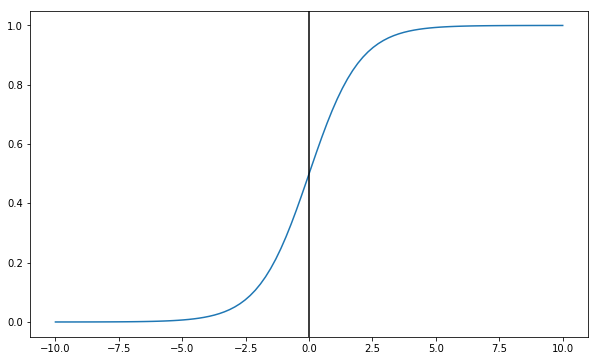

In [2]:
X = np.linspace(-10, 10, 100)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, sigmoid(X))
ax.axvline(0, color='k')

## Cost Function

So our prediction vector is going to be a multiplication of the inputs $x_1, ..., x_n$ by the weights $w_1, ..., w_n$, plus a bias term $b$.

$\hat{y} = \sigma(w^{T}x + b) \quad \text{where} \quad \sigma(z) = \frac{1}{1+e^{-z}}$

Traditionally, we might consider some sort of cost function like squared error-- the difference between observation and actual, squared.

$\mathcal{L}(\hat{y}, y) = \frac{1}{2}(\hat{y} - y)^{2}$

However, this leads to some very poorly-behaved curves. Instead, we use:

$\mathcal{L}(\hat{y}, y) = -\big(y\log\hat{y} + (1-y)\log(1-\hat{y})\big)$

## Intution

Recall the shape of the `log` function:

- It's basically negative infinity at `0`
- It is exactly `0` at `1`
- It scales (slowly) to positive infinity

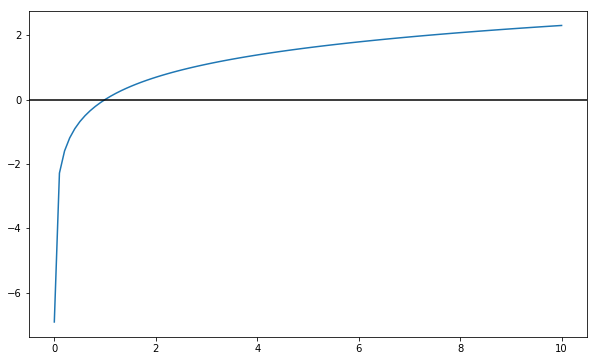

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

X = np.linspace(0.001, 10, 100)
ax.plot(X, np.log(X))
ax.axhline(0, color='black')

So looking back at this cost function and considering the behavior of `log` consider what happens in the following scenarios

### If `y=1`

Our Loss Fucntion becomes

$\mathcal{L} = -\big( \log(\hat{y}) + 0\big)$

Therefore, if we predict `1`, then `log(1)` evalues to `0`-- no error.

Conversely, if we predict `0`, then we have basically infinite error. We don't ever want to be certain that it's a `0` when it's actually not.

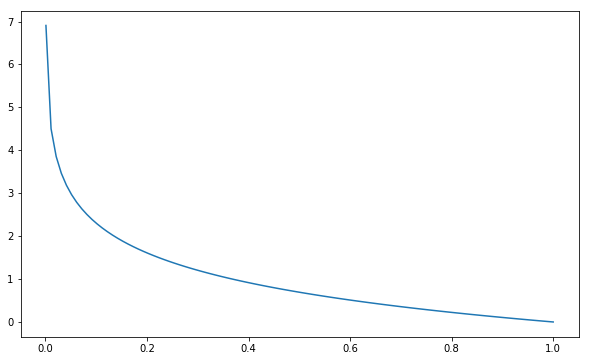

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

X = np.linspace(0.001, 1, 100)
ax.plot(X, -np.log(X))

### If `y=0`

Our Loss Fucntion becomes

$\mathcal{L}(\hat{y}, y) = -\big(0 + (1)\log(1-\hat{y})\big)$

And looking at that last term, we see that as our prediction gets closer and closer to `1`, the error becomes infinite.

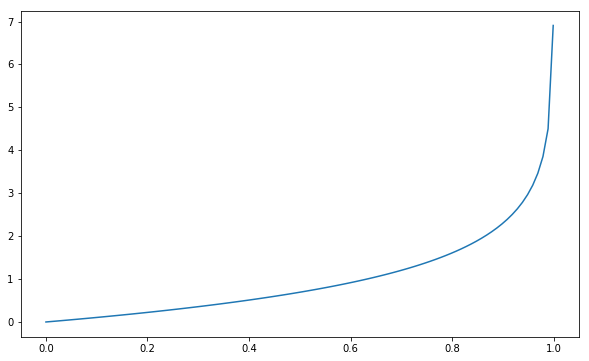

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

X = np.linspace(0., .999, 100)
ax.plot(X, -np.log(1-X))

## Cost Function

If this intuition makes sense at a record-level, then extrapolating this *loss function* to each of our records helps us arrive at our *Cost Function*, expressed as

$J(w, b) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(\hat{y}^{i}, y^{i})$

$J(w, b) = - \frac{1}{m} \sum_{i=1}^{m} \big(y^{i}\log\hat{y}^{i} + (1-y^{i})\log(1-\hat{y}^{i})\big)$